In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv(r'C:\Users\91638\Downloads\heart.csv')

In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# Splitting the dataset into features (X) and target (y)
X = df.drop(columns=['target'])  # Features: All columns except 'target'
y = df['target']  # Target: 'target' column (1 = heart disease, 0 = no disease)

In [14]:
# Normalizing the data to bring all features to a similar scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# 80% of the data will be used for training, and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
#Train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Creating the Logistic Regression model with a high iteration limit
logreg.fit(X_train, y_train)  # Fitting the model to the training data

LogisticRegression(max_iter=1000)

In [17]:
#Make predictions on the test set
y_pred = logreg.predict(X_test)  # Using the model to predict on the test data

In [18]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
print("Accuracy of Logistic Regression model: {:.2f}%".format(accuracy * 100))

Accuracy of Logistic Regression model: 79.51%


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Confusion Matrix:
 [[73 29]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

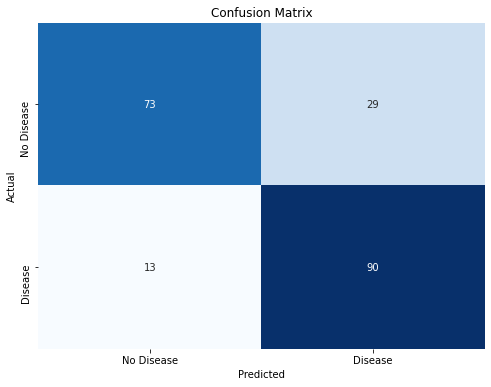

In [21]:
#Visualizing the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [23]:
new_data = np.array([[53,1,0,127,312,0,1,150,0,1.0,2,2,3]])

In [24]:
new_data_scaled = scaler.transform(new_data)

C:\Users\91638\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
new_prediction = logreg.predict(new_data_scaled)
print("Prediction for New Data (1 = Disease, 0 = No Disease):", new_prediction)

Prediction for New Data (1 = Disease, 0 = No Disease): [0]


In [26]:
new_probabilities = logreg.predict_proba(new_data_scaled)
print("Probability of Disease for New Data:", new_probabilities)

Probability of Disease for New Data: [[0.94809319 0.05190681]]
